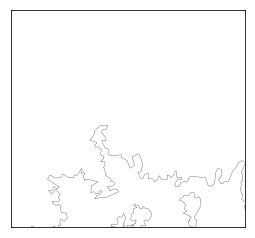

[array([128.574101  , 128.574101  , 128.65134586, 128.698237  ,
       128.698237  ]), array([35.1549819 , 35.1549819 , 35.22076576, 35.2434083 , 35.2434083 ]), array([-2668.97943564,   286.45130413, -4854.98859185,  6808.14456964,
        -604.65007362,   790.60078374, -1442.34771245,    -8.67314125,
         174.37569833]), 1, 1]


In [25]:
import os
import conda


os.environ["PROJ_LIB"] = r"C:\Users\CPB06GameN\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share"

from mpl_toolkits.basemap import Basemap,maskoceans
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


map = Basemap(projection='merc', lat_0=35.1827, lon_0=128.6232, resolution = 'h',
        urcrnrlat=35.458821, llcrnrlat=34.9928, llcrnrlon=128.353563, urcrnrlon=128.967817)


map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)

map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))


data = {'경화동' : (128.689528,35.1549819,90), #61.53
        '명서동' : (128.64176,35.2434083,90), # 61.03
        '봉암동' : (128.602486,35.2176096,0), # 59.8
        '사파동' : (128.698237,35.2218386,0), # 60.9
        '용지동' : (128.684517,35.236053,180), # 66.5
        '웅남동' : (128.658286,35.2122894,270), # 69
        '회원동' : (128.574101,35.2183963,180),# 63.66
        '반송로' : (128.664748,35.2340283,180) } # 65.53

x,y,z = zip(*data.values())

xnew, ynew = np.mgrid[-30:60:0.1, -50:50:0.1]

tck = interpolate.bisplrep(x, y, z, s=0,kx=1,ky=1)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

col_plot = map.pcolormesh(xnew, ynew, znew, latlon=True, cmap='hsv')
plt.show()

print(tck)